In [17]:
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [18]:
Train_Data = pd.read_csv('Encoded_Train_Data.csv')
Val_Data = pd.read_csv('Encoded_Val_Data.csv') 
Test_Data = pd.read_csv('Encoded_Test_Data.csv') 

In [19]:
Train_Data.columns


Index(['Unnamed: 0', 'Reservation-id', 'Gender', 'Age', 'Educational_Level',
       'Income', 'Expected_checkin', 'Expected_checkout', 'Booking_date',
       'Adults', 'Children', 'Babies', 'Meal_Type', 'Visted_Previously',
       'Previous_Cancellations', 'Deposit_type', 'Required_Car_Parking',
       'Reservation_Status', 'Use_Promotion', 'Discount_Rate', 'Room_Rate',
       'Ethnicity_African American', 'Ethnicity_Asian American',
       'Ethnicity_Latino', 'Ethnicity_caucasian', 'Country_region_East',
       'Country_region_North', 'Country_region_South', 'Country_region_West',
       'Hotel_Type_Airport Hotels', 'Hotel_Type_City Hotel',
       'Hotel_Type_Resort', 'Booking_channel_Agent', 'Booking_channel_Direct',
       'Booking_channel_Online', 'Days_plan_to_stay', 'checkin_year',
       'checkin_month', 'checkin_day', 'checkin_day_of_the_week',
       'Days_until_checkin', 'Booking_month', 'Booking_day_of_the_week',
       'Min_num_of_rooms', 'Total_Min_Cost', 'Min_Discount_amo

In [20]:
Continus = ['Age','Discount_Rate','Room_Rate','checkin_month','Adults', 'Children', 'Babies','Income','Meal_Type',
            'Days_until_checkin','Min_num_of_rooms','Total_Min_Cost','Min_Discount_amount','Educational_Level']

Categorical = ['Gender', 'Visted_Previously','Previous_Cancellations', 'Use_Promotion',
              'Ethnicity_African American', 'Ethnicity_Asian American','Ethnicity_Latino', 'Ethnicity_caucasian', 
              'Country_region_East','Country_region_North', 'Country_region_South', 'Country_region_West',
               'Hotel_Type_Airport Hotels', 'Hotel_Type_City Hotel','Hotel_Type_Resort', 
               'Booking_channel_Agent', 'Booking_channel_Direct','Booking_channel_Online',
               'Booking_month','Booking_day_of_the_week','checkin_day_of_the_week']

Label =['Reservation_Status']

In [21]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['Min Value'] = list(df.min(axis=0))
    summary['Max Value'] = list(df.max(axis=0))
    return summary

resumetable(Train_Data.loc[:,Categorical+Continus])

Dataset Shape: (27499, 35)


,Name,dtypes,Missing,Uniques,Min Value,Max Value
0,Gender,int64,0,2,0.0,1.0
1,Visted_Previously,int64,0,2,0.0,1.0
2,Previous_Cancellations,int64,0,2,0.0,1.0
3,Use_Promotion,int64,0,2,0.0,1.0
4,Ethnicity_African American,int64,0,2,0.0,1.0
5,Ethnicity_Asian American,int64,0,2,0.0,1.0
6,Ethnicity_Latino,int64,0,2,0.0,1.0
7,Ethnicity_caucasian,int64,0,2,0.0,1.0
8,Country_region_East,int64,0,2,0.0,1.0
9,Country_region_North,int64,0,2,0.0,1.0


In [44]:
from scipy import stats
z_scores = stats.zscore(Train_Data.loc[:,Categorical+Continus+Label])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_Train_Data = Train_Data.loc[:,Categorical+Continus+Label][filtered_entries]

Y_train = new_Train_Data.loc[:,Label]
Y_val = Val_Data.loc[:,Label]

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
pt.fit(new_Train_Data.loc[:,Categorical+Continus])
transformed_new_Train_Data = pt.transform(new_Train_Data.loc[:,Categorical+Continus])
transformed_Test_Data = pt.transform(Test_Data.loc[:,Categorical+Continus])
transformed_Val_Data = pt.transform(Val_Data.loc[:,Categorical+Continus])

<AxesSubplot:>

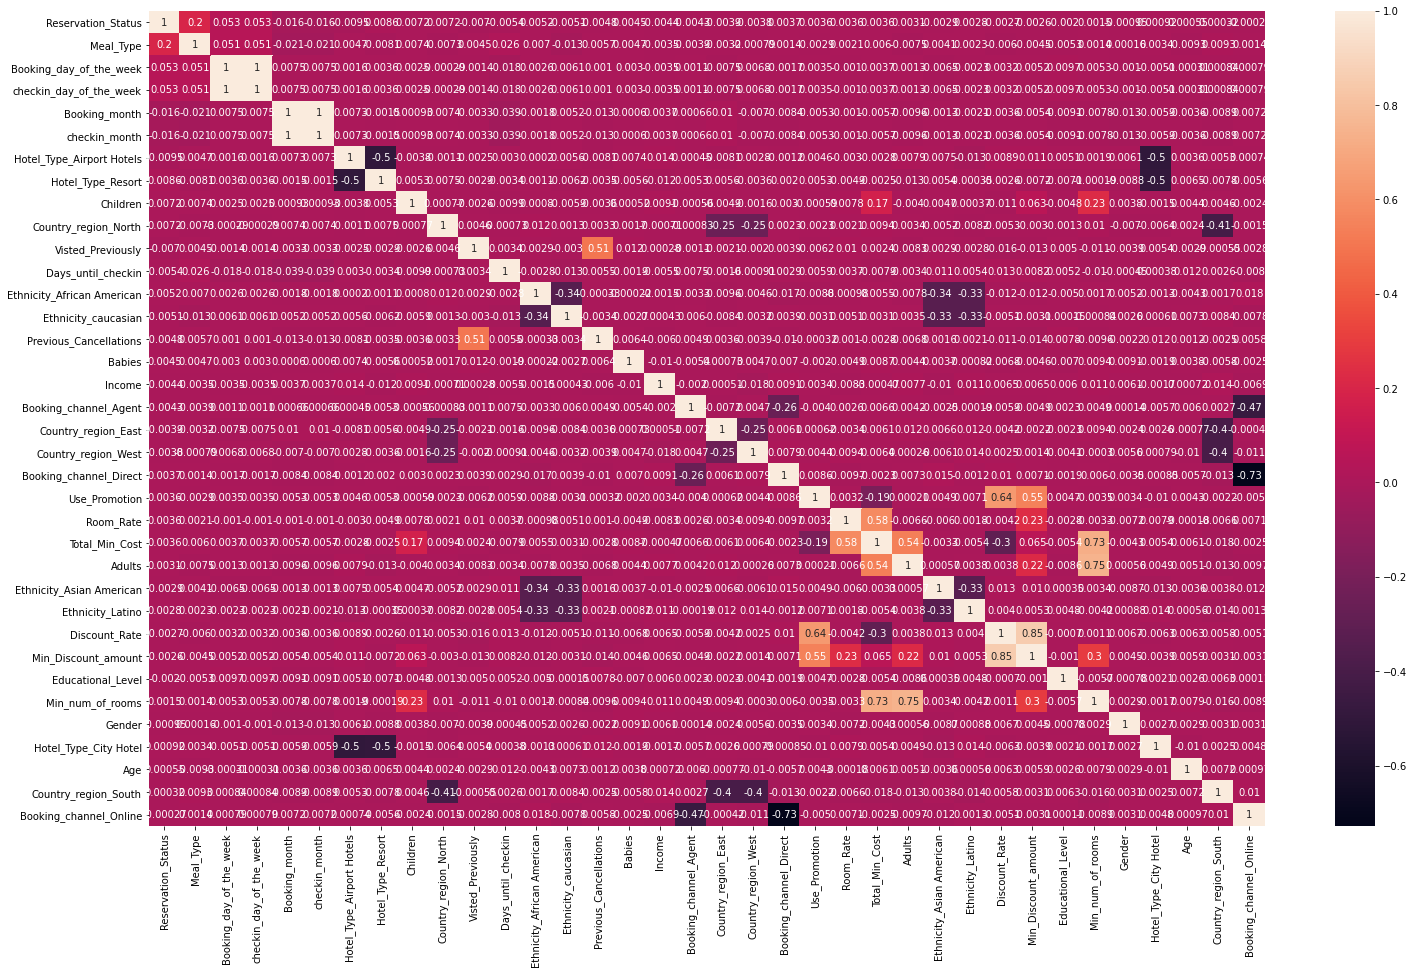

In [48]:
import seaborn as sn
from pandas import DataFrame

t=Categorical+Continus+Label

s=abs(Train_Data[t].corr()['Reservation_Status'])
p=s.sort_values(ascending=True)
p.index

t=p.index[::-1]
df = pd.DataFrame(Train_Data[t],columns=t)
#['age','blood pressure','specific gravity','albumin','sugar','blood glucose random',
#                             'blood urea','serum creatinine','hemoglobin','hypertension','pus cell','class']
fig, ax = plt.subplots(figsize=(25,15),sharex=True, sharey=True) 
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True,annot_kws={"size": 10},ax=ax)

In [55]:
from catboost import CatBoostClassifier

Continus = ['Age','Discount_Rate','Room_Rate','checkin_month','Adults', 'Children', 'Babies','Income','Meal_Type',
            'Days_until_checkin','Min_num_of_rooms','Total_Min_Cost','Min_Discount_amount','Educational_Level']

Categorical = ['Gender', 'Visted_Previously','Previous_Cancellations', 'Use_Promotion',
              'Ethnicity_African American', 'Ethnicity_Asian American','Ethnicity_Latino', 'Ethnicity_caucasian', 
              'Country_region_East','Country_region_North', 'Country_region_South', 'Country_region_West',
               'Hotel_Type_Airport Hotels', 'Hotel_Type_City Hotel','Hotel_Type_Resort', 
               'Booking_channel_Agent', 'Booking_channel_Direct','Booking_channel_Online',
               'Booking_month','Booking_day_of_the_week','checkin_day_of_the_week']

Label =['Reservation_Status']

Classifier = CatBoostClassifier(random_state=435,fold_permutation_block=10,
                                class_weights = (0.5,2.75,4.5),)

X_train = transformed_new_Train_Data

Classifier.fit(X_train, Y_train)

Learning rate set to 0.093453
0:	learn: 1.0908116	total: 7.5ms	remaining: 7.5s
1:	learn: 1.0847246	total: 14.1ms	remaining: 7.01s
2:	learn: 1.0795653	total: 20.9ms	remaining: 6.94s
3:	learn: 1.0751903	total: 27.5ms	remaining: 6.84s
4:	learn: 1.0714486	total: 33.7ms	remaining: 6.7s
5:	learn: 1.0678352	total: 40.3ms	remaining: 6.67s
6:	learn: 1.0652720	total: 43.8ms	remaining: 6.21s
7:	learn: 1.0622093	total: 50.5ms	remaining: 6.26s
8:	learn: 1.0596650	total: 57.4ms	remaining: 6.33s
9:	learn: 1.0575695	total: 63.9ms	remaining: 6.33s
10:	learn: 1.0555372	total: 70.2ms	remaining: 6.31s
11:	learn: 1.0540219	total: 76.8ms	remaining: 6.32s
12:	learn: 1.0521864	total: 83.3ms	remaining: 6.32s
13:	learn: 1.0507150	total: 89.7ms	remaining: 6.32s
14:	learn: 1.0493131	total: 97.8ms	remaining: 6.42s
15:	learn: 1.0480018	total: 104ms	remaining: 6.41s
16:	learn: 1.0468685	total: 111ms	remaining: 6.41s
17:	learn: 1.0459303	total: 117ms	remaining: 6.41s
18:	learn: 1.0450310	total: 124ms	remaining: 6.4s


165:	learn: 0.9370794	total: 1.09s	remaining: 5.46s
166:	learn: 0.9364033	total: 1.09s	remaining: 5.46s
167:	learn: 0.9354994	total: 1.1s	remaining: 5.45s
168:	learn: 0.9347737	total: 1.11s	remaining: 5.45s
169:	learn: 0.9342250	total: 1.11s	remaining: 5.44s
170:	learn: 0.9334722	total: 1.12s	remaining: 5.43s
171:	learn: 0.9328415	total: 1.13s	remaining: 5.43s
172:	learn: 0.9322008	total: 1.13s	remaining: 5.42s
173:	learn: 0.9316761	total: 1.14s	remaining: 5.42s
174:	learn: 0.9311767	total: 1.15s	remaining: 5.41s
175:	learn: 0.9304861	total: 1.15s	remaining: 5.4s
176:	learn: 0.9297017	total: 1.16s	remaining: 5.4s
177:	learn: 0.9291960	total: 1.17s	remaining: 5.39s
178:	learn: 0.9284214	total: 1.17s	remaining: 5.38s
179:	learn: 0.9277887	total: 1.18s	remaining: 5.38s
180:	learn: 0.9273007	total: 1.19s	remaining: 5.37s
181:	learn: 0.9269151	total: 1.19s	remaining: 5.36s
182:	learn: 0.9264289	total: 1.2s	remaining: 5.35s
183:	learn: 0.9256774	total: 1.21s	remaining: 5.35s
184:	learn: 0.92

331:	learn: 0.8436204	total: 2.18s	remaining: 4.38s
332:	learn: 0.8429862	total: 2.19s	remaining: 4.38s
333:	learn: 0.8423725	total: 2.19s	remaining: 4.37s
334:	learn: 0.8420934	total: 2.2s	remaining: 4.36s
335:	learn: 0.8416878	total: 2.2s	remaining: 4.36s
336:	learn: 0.8412894	total: 2.21s	remaining: 4.35s
337:	learn: 0.8408460	total: 2.22s	remaining: 4.34s
338:	learn: 0.8401015	total: 2.22s	remaining: 4.34s
339:	learn: 0.8395763	total: 2.23s	remaining: 4.33s
340:	learn: 0.8392245	total: 2.24s	remaining: 4.32s
341:	learn: 0.8387972	total: 2.24s	remaining: 4.32s
342:	learn: 0.8384737	total: 2.25s	remaining: 4.31s
343:	learn: 0.8379148	total: 2.26s	remaining: 4.3s
344:	learn: 0.8375683	total: 2.26s	remaining: 4.29s
345:	learn: 0.8370698	total: 2.27s	remaining: 4.29s
346:	learn: 0.8366151	total: 2.27s	remaining: 4.28s
347:	learn: 0.8361622	total: 2.28s	remaining: 4.28s
348:	learn: 0.8355947	total: 2.29s	remaining: 4.27s
349:	learn: 0.8349725	total: 2.29s	remaining: 4.26s
350:	learn: 0.8

494:	learn: 0.7675745	total: 3.28s	remaining: 3.34s
495:	learn: 0.7671024	total: 3.28s	remaining: 3.33s
496:	learn: 0.7666971	total: 3.29s	remaining: 3.33s
497:	learn: 0.7662178	total: 3.3s	remaining: 3.32s
498:	learn: 0.7658127	total: 3.3s	remaining: 3.32s
499:	learn: 0.7653547	total: 3.31s	remaining: 3.31s
500:	learn: 0.7647978	total: 3.32s	remaining: 3.3s
501:	learn: 0.7641068	total: 3.32s	remaining: 3.3s
502:	learn: 0.7637286	total: 3.33s	remaining: 3.29s
503:	learn: 0.7632181	total: 3.34s	remaining: 3.28s
504:	learn: 0.7626918	total: 3.34s	remaining: 3.28s
505:	learn: 0.7622621	total: 3.35s	remaining: 3.27s
506:	learn: 0.7616612	total: 3.36s	remaining: 3.26s
507:	learn: 0.7612673	total: 3.36s	remaining: 3.26s
508:	learn: 0.7609501	total: 3.37s	remaining: 3.25s
509:	learn: 0.7603806	total: 3.38s	remaining: 3.24s
510:	learn: 0.7599157	total: 3.38s	remaining: 3.24s
511:	learn: 0.7593572	total: 3.39s	remaining: 3.23s
512:	learn: 0.7589310	total: 3.4s	remaining: 3.22s
513:	learn: 0.758

656:	learn: 0.7031861	total: 4.37s	remaining: 2.28s
657:	learn: 0.7028187	total: 4.37s	remaining: 2.27s
658:	learn: 0.7024544	total: 4.38s	remaining: 2.27s
659:	learn: 0.7021439	total: 4.39s	remaining: 2.26s
660:	learn: 0.7018903	total: 4.39s	remaining: 2.25s
661:	learn: 0.7016600	total: 4.4s	remaining: 2.25s
662:	learn: 0.7012719	total: 4.41s	remaining: 2.24s
663:	learn: 0.7008780	total: 4.42s	remaining: 2.23s
664:	learn: 0.7004471	total: 4.42s	remaining: 2.23s
665:	learn: 0.7000747	total: 4.43s	remaining: 2.22s
666:	learn: 0.6998371	total: 4.44s	remaining: 2.21s
667:	learn: 0.6995282	total: 4.44s	remaining: 2.21s
668:	learn: 0.6991786	total: 4.45s	remaining: 2.2s
669:	learn: 0.6987373	total: 4.46s	remaining: 2.19s
670:	learn: 0.6982919	total: 4.46s	remaining: 2.19s
671:	learn: 0.6979746	total: 4.47s	remaining: 2.18s
672:	learn: 0.6975115	total: 4.48s	remaining: 2.17s
673:	learn: 0.6972399	total: 4.49s	remaining: 2.17s
674:	learn: 0.6967599	total: 4.49s	remaining: 2.16s
675:	learn: 0.

815:	learn: 0.6479449	total: 5.45s	remaining: 1.23s
816:	learn: 0.6475445	total: 5.46s	remaining: 1.22s
817:	learn: 0.6472093	total: 5.46s	remaining: 1.22s
818:	learn: 0.6468537	total: 5.47s	remaining: 1.21s
819:	learn: 0.6466979	total: 5.48s	remaining: 1.2s
820:	learn: 0.6462789	total: 5.49s	remaining: 1.2s
821:	learn: 0.6459987	total: 5.49s	remaining: 1.19s
822:	learn: 0.6456255	total: 5.5s	remaining: 1.18s
823:	learn: 0.6453438	total: 5.51s	remaining: 1.18s
824:	learn: 0.6451152	total: 5.51s	remaining: 1.17s
825:	learn: 0.6448528	total: 5.52s	remaining: 1.16s
826:	learn: 0.6444636	total: 5.53s	remaining: 1.16s
827:	learn: 0.6441476	total: 5.54s	remaining: 1.15s
828:	learn: 0.6438776	total: 5.54s	remaining: 1.14s
829:	learn: 0.6434658	total: 5.55s	remaining: 1.14s
830:	learn: 0.6430680	total: 5.56s	remaining: 1.13s
831:	learn: 0.6427621	total: 5.56s	remaining: 1.12s
832:	learn: 0.6424264	total: 5.57s	remaining: 1.12s
833:	learn: 0.6421066	total: 5.58s	remaining: 1.11s
834:	learn: 0.6

974:	learn: 0.6004859	total: 6.54s	remaining: 168ms
975:	learn: 0.6001751	total: 6.55s	remaining: 161ms
976:	learn: 0.5999758	total: 6.56s	remaining: 154ms
977:	learn: 0.5997249	total: 6.56s	remaining: 148ms
978:	learn: 0.5994281	total: 6.57s	remaining: 141ms
979:	learn: 0.5990904	total: 6.58s	remaining: 134ms
980:	learn: 0.5988089	total: 6.58s	remaining: 128ms
981:	learn: 0.5985091	total: 6.59s	remaining: 121ms
982:	learn: 0.5981642	total: 6.6s	remaining: 114ms
983:	learn: 0.5978130	total: 6.61s	remaining: 107ms
984:	learn: 0.5975807	total: 6.61s	remaining: 101ms
985:	learn: 0.5973344	total: 6.62s	remaining: 94ms
986:	learn: 0.5971251	total: 6.63s	remaining: 87.3ms
987:	learn: 0.5969086	total: 6.63s	remaining: 80.6ms
988:	learn: 0.5965936	total: 6.64s	remaining: 73.9ms
989:	learn: 0.5962952	total: 6.65s	remaining: 67.1ms
990:	learn: 0.5959880	total: 6.65s	remaining: 60.4ms
991:	learn: 0.5957773	total: 6.66s	remaining: 53.7ms
992:	learn: 0.5954587	total: 6.67s	remaining: 47ms
993:	lear

0.769645933014354


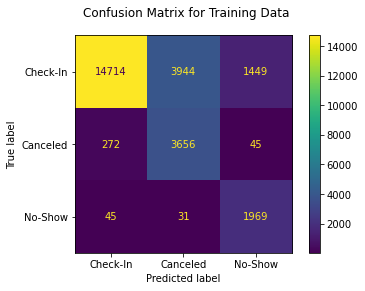

              precision    recall  f1-score   support

    Check-In       0.98      0.73      0.84     20107
    Canceled       0.48      0.92      0.63      3973
     No-Show       0.57      0.96      0.71      2045

    accuracy                           0.78     26125
   macro avg       0.68      0.87      0.73     26125
weighted avg       0.87      0.78      0.80     26125



In [56]:
Y_train_predict = Classifier.predict(X_train)[:,0]

print(Classifier.score(Y_train_predict, Y_train))
fig=plot_confusion_matrix(Classifier, X_train,Y_train,
display_labels=["Check-In","Canceled","No-Show"])
fig.figure_.suptitle("Confusion Matrix for Training Data")
plt.show()

from sklearn.metrics import classification_report
target_names = ["Check-In","Canceled","No-Show"]
print(classification_report(Y_train, Y_train_predict, target_names=target_names))

0.5856675154601674


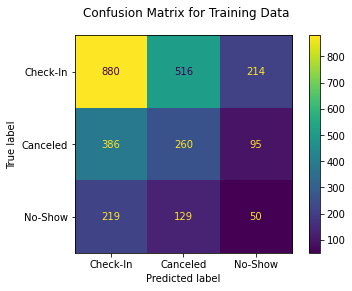

              precision    recall  f1-score   support

    Check-In       0.59      0.55      0.57      1610
    Canceled       0.29      0.35      0.32       741
     No-Show       0.14      0.13      0.13       398

    accuracy                           0.43      2749
   macro avg       0.34      0.34      0.34      2749
weighted avg       0.44      0.43      0.44      2749



In [57]:
X_val = transformed_Val_Data

Y_val_predict = Classifier.predict(X_val)[:,0]

print(Classifier.score(Y_val_predict, Y_val))
fig=plot_confusion_matrix(Classifier, X_val,Y_val,display_labels=["Check-In","Canceled","No-Show"])
fig.figure_.suptitle("Confusion Matrix for Training Data")
plt.show()

from sklearn.metrics import classification_report
target_names = ["Check-In","Canceled","No-Show"]
print(classification_report(Y_val, Y_val_predict, target_names=target_names))

In [58]:
X_Test = Test_Data.loc[:,Categorical+Continus]
# Y_val = Test_Data.loc[:,Label]

Test_Data_predict = Classifier.predict(X_Test)[:,0]

Test_Data["Reservation_Status"] = Test_Data_predict

# Test_Data["Reservation_Status"]=Test_Data["Reservation_Status"].replace(3,'No-Show')
# Test_Data["Reservation_Status"]=Test_Data["Reservation_Status"].replace(2,"Canceled")
# Test_Data["Reservation_Status"]=Test_Data["Reservation_Status"].replace(1,"Check-In")

Submission = Test_Data.loc[:,["Reservation-id","Reservation_Status"]]
Submission.to_csv("Submission Model-3 Catboost.csv",index=False)
Submission

CatBoostError: c:/program files (x86)/go agent/pipelines/buildmaster/catboost.git/catboost/libs/data/model_dataset_compatibility.cpp:72: Feature 5 is present in model but not in pool.

In [ ]:
import lime
import lime.lime_tabular

X_val = Val_Data.loc[:,Categorical+Continus]
Y_val = Val_Data.loc[:,Label]

explainer = lime.lime_tabular.LimeTabularExplainer(np.array(X_val),
                    feature_names=Categorical+Continus, 
                    class_names=[Label], 
                    # categorical_features=, n
                    # There is no categorical features in this example, otherwise specify them.                               
                    verbose=True, mode='regression')

explainer

In [51]:
exp = explainer.explain_instance(X_val.iloc[3], Classifier.predict)
exp.as_pyplot_figure()

NameError: name 'explainer' is not defined

Intercept 1.5159731151856746
Prediction_local [1.18824855]
Right: 2


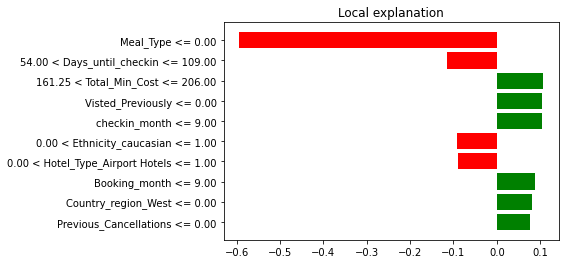

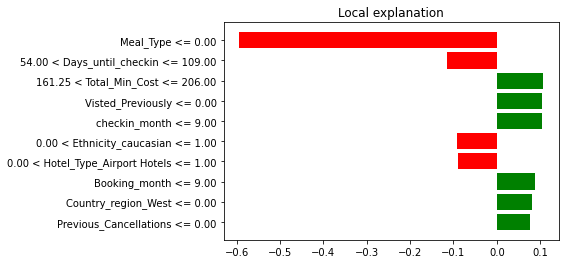

In [46]:
exp = explainer.explain_instance(X_val.iloc[1545], Classifier.predict)
exp.as_pyplot_figure()

In [44]:
X_val

,Gender,Educational_Level,Income,Meal_Type,Visted_Previously,Previous_Cancellations,Use_Promotion,Ethnicity_African American,Ethnicity_Asian American,Ethnicity_Latino,...,Room_Rate,checkin_month,Adults,Children,Babies,Days_until_checkin,Booking_month,Min_num_of_rooms,Total_Min_Cost,Min_Discount_amount
0,1,3,0,1,0,0,1,0,0,0,...,192,8,2,2,0,195.0,8,1.0,172.80,19.20
1,1,2,1,2,1,0,0,0,0,1,...,187,8,2,2,0,175.0,8,1.0,187.00,0.00
2,0,2,0,2,0,0,1,0,1,0,...,227,9,3,1,0,193.0,9,1.0,227.00,0.00
3,0,2,1,2,1,0,1,0,0,1,...,189,8,1,2,0,103.0,8,1.0,179.55,9.45
4,0,2,1,1,1,0,1,0,1,0,...,218,8,1,1,0,92.0,8,1.0,196.20,21.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2744,0,2,2,0,1,0,1,0,0,0,...,199,11,5,1,1,37.0,11,2.0,298.50,99.50
2745,0,2,1,2,0,0,1,0,0,0,...,106,12,3,2,0,154.0,12,1.0,90.10,15.90
2746,1,3,1,2,0,0,1,0,1,0,...,136,11,2,3,0,30.0,11,1.0,115.60,20.40
2747,1,2,0,1,1,1,1,0,1,0,...,226,11,5,1,0,170.0,11,2.0,452.00,0.00


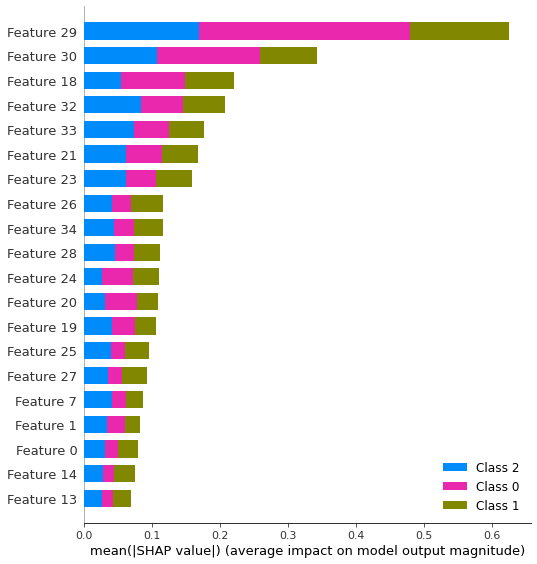

In [54]:
import shap
explainer = shap.TreeExplainer(Classifier)
X_val = transformed_Val_Data
shap_values = explainer.shap_values(X_val)
shap.summary_plot(shap_values, X_val)